# CSCI2000U - Scientific Data Analysis
# Final Project: **NBA MVP Predictor**

## **Project Group 16**
* **Hasan Chakaroun** - 100788546
* **Mohammad** - 100755461
* **Preet Panchal** - 100707094
* **Eihab Syed** - 100707448

### **Dataset Selected:** ###
- **Name:** NBA Players Data - all_seasons.csv
&nbsp;
- **Source:** https://www.kaggle.com/justinas/nba-players-data
&nbsp;
- **Reference:** Cirtautas, J. (2021, August 2). NBA players. Kaggle. Retrieved November 26, 2021, from https://www.kaggle.com/justinas/nba-players-data. 
&nbsp;
- **Creator:** Justinas Cirtautas, Data Scientist


## **INTRODUCTION**

## **DESCRIPTION OF DATASET**

## **ANALYSIS OF DATASET**

In [967]:
# importing used libraries
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
from datetime import datetime as dt

# importing seaborn
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('all_seasons.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()
# the dataframe
df = pd.DataFrame(data) 
df

You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


,,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59411999999999,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052000000000000005,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59411999999999,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.14300000000000002,0.267,0.265,0.33299999999999996,0.0,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59411999999999,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.16699999999999998,0.542,0.10099999999999999,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59411999999999,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.11800000000000001,0.233,0.48200000000000004,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30.0,190.5,90.7184,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.028999999999999998,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.79024,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.09699999999999999,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.52228000000001,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011000000000000001,0.073,0.179,0.597,0.07400000000000001,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.2,98.88305600000001,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.19399999999999998,0.614,0.055999999999999994,2020-21


### **Quality of Dataset:**
- 

### **Data Cleaning:** 

In [968]:
# removing additional placeholder/column for index
df.drop(columns=[''], inplace=True)
df['college'] = df['college'].replace(['None'],'No College')
df['player_height'] = df['player_height'].astype(float)
df['player_weight'] = df['player_weight'].astype(float)
df['age'] = df['age'].astype(float).astype(int)
df['pts'] = df['pts'].astype(float)
df['reb'] = df['reb'].astype(float)
df['ast'] = df['ast'].astype(float)
df['gp'] = df['gp'].astype(float).astype(int)
df['oreb_pct'] = df['oreb_pct'].astype(float)
df['dreb_pct'] = df['dreb_pct'].astype(float)
df['net_rating'] = df['net_rating'].astype(float)
df['ts_pct'] = df['ts_pct'].astype(float)
df[:5]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052000000000000005,1996-97
1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.0,1996-97
2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.16699999999999998,0.542,0.10099999999999999,1996-97
4,Martin Muursepp,DAL,22,205.74,106.59412,No College,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


### **Code & Analysis of Basic Characteristics of Dataset:** 


In [969]:
# displaying the total number of data using string and len inbuilt python function
print("There are " + str(len(data)) + " data records in all_seasons.csv. ")

There are 11700 data records in all_seasons.csv. 


In [970]:
print("Q2) Here are the top 5 data records: ")
print(data[:5]) # using indexing to display the first 5 records

Q2) Here are the top 5 data records: 
[{'': '0', 'player_name': 'Travis Knight', 'team_abbreviation': 'LAL', 'age': '22.0', 'player_height': '213.36', 'player_weight': '106.59411999999999', 'college': 'Connecticut', 'country': 'USA', 'draft_year': '1996', 'draft_round': '1', 'draft_number': '29', 'gp': '71', 'pts': '4.8', 'reb': '4.5', 'ast': '0.5', 'net_rating': '6.2', 'oreb_pct': '0.127', 'dreb_pct': '0.182', 'usg_pct': '0.142', 'ts_pct': '0.536', 'ast_pct': '0.052000000000000005', 'season': '1996-97'}, {'': '1', 'player_name': 'Matt Fish', 'team_abbreviation': 'MIA', 'age': '27.0', 'player_height': '210.82', 'player_weight': '106.59411999999999', 'college': 'North Carolina-Wilmington', 'country': 'USA', 'draft_year': '1992', 'draft_round': '2', 'draft_number': '50', 'gp': '6', 'pts': '0.3', 'reb': '0.8', 'ast': '0.0', 'net_rating': '-15.1', 'oreb_pct': '0.14300000000000002', 'dreb_pct': '0.267', 'usg_pct': '0.265', 'ts_pct': '0.33299999999999996', 'ast_pct': '0.0', 'season': '1996-9

In [971]:
# creating a set with all the player names from data to only include each unique team with no repeats
unique_name = {player['player_name'] for player in data}
# then displaying the length of unique_name as a string
print("There are " + str(len(unique_name)) + " unique NBA player names in the dataset. Therefore, there are " + str(len(unique_name)) + " players that played in the National Basketball Association since 1996.\n")
print("Here are the first 100 player names from the unique_name dict. (List was too long to print completely): ")
print(list(unique_name)[:50])

There are 2333 unique NBA player names in the dataset. Therefore, there are 2333 players that played in the National Basketball Association since 1996.

Here are the first 100 player names from the unique_name dict. (List was too long to print completely): 
['Jayson Tatum', 'Dan Majerle', 'Desmond Bane', 'Marcus Brown', 'Chris Taft', 'Cole Aldrich', 'Vernon Maxwell', 'Brian Cook', 'Malik Hairston', 'Damone Brown', 'Michael Curry', 'Jelani McCoy', 'Larry Stewart', 'Vincent Edwards', 'Stephane Lasme', 'Mark Bradtke', 'Joey Dorsey', 'Ed Davis', 'Jermaine Jackson', 'Malcolm Thomas', 'Eddie House', 'CJ Elleby', 'Jakob Poeltl', 'Paul Reed', 'Lamar Patterson', 'Duane Causwell', 'Delon Wright', 'Ty Jerome', 'Josh Hall', 'Jawad Williams', 'Corey Maggette', 'Malcolm Delaney', 'Briante Weber', 'Antoine Rigaudeau', 'Chris Douglas-Roberts', 'Jonathan Isaac', 'Elliot Perry', 'Anthony Bennett', 'Jamal Murray', 'Herb Williams', 'Andrew Wiggins', 'Spencer Dinwiddie', 'Marial Shayok', 'Joel Bolomboy', '

In [972]:
# creating a set with all the teams from data to only include each unique team with no repeats
unique_team = {team['team_abbreviation'] for team in data}
# then displaying the length of unique_team as a string
print("Not all team names in the dataset are unique. There are " + str(len(unique_team)) + " unique NBA teams in the dataset. Therefore, there are " + str(len(unique_team)) + " teams that take part in the National Basketball Association since 1996.")
print(unique_team)

Not all team names in the dataset are unique. There are 36 unique NBA teams in the dataset. Therefore, there are 36 teams that take part in the National Basketball Association since 1996.
{'MEM', 'LAC', 'DET', 'POR', 'UTA', 'VAN', 'TOR', 'NOH', 'SAS', 'CLE', 'OKC', 'ATL', 'MIN', 'SAC', 'CHA', 'NOP', 'GSW', 'WAS', 'PHI', 'PHX', 'NYK', 'ORL', 'NJN', 'CHH', 'NOK', 'MIA', 'LAL', 'SEA', 'DEN', 'CHI', 'HOU', 'DAL', 'IND', 'BOS', 'BKN', 'MIL'}


In [973]:
# creating a set with all the colleges from data to only include each unique college with no repeats
unique_college = {player['college'] for player in data}
# then displaying the length of unique_college as a string
print("Not all college names in the dataset are unique. There are " + str(len(unique_college)) + " unique colleges where the NBA players played before coming to the NBA in the dataset.\n")
print("Here are the first 100 colleges from the unique_college dict. (List was too long to print completely): ")
print(list(unique_college)[:50])

Not all college names in the dataset are unique. There are 336 unique colleges where the NBA players played before coming to the NBA in the dataset.

Here are the first 100 colleges from the unique_college dict. (List was too long to print completely): 
['Western Carolina', 'Jacksonville', 'North Carolina State', 'Jackson State', 'Grand Canyon', 'Norfolk State', 'Oral Roberts', 'Providence', 'Molloy', 'Nebraska-Lincoln', 'Alabama Huntsville', 'Augustana (SD)', 'Lehigh', 'Tennessee Tech', 'Utah Valley', "Master's", 'Texas A&M', 'No College', 'Southeastern Oklahoma State', 'North Carolina-Charlotte', 'Georgia Tech', 'Missouri State', 'Montana State', 'Drexel', 'Central Arkansas', 'Virginia Union', "Saint Joseph's", 'California-Los Angeles', 'Clemson', 'Duke', 'Indiana Purdue-Indianapolis', 'Midland', 'Barton Community College', 'Louisiana-Lafayette', 'Oklahoma State', 'Walsh', 'Venezuela', 'Mississippi State', 'Syracuse', 'Portland State', 'Nicholls State', 'Auburn', 'Kansas', 'Cal State

In [974]:
# creating a set with all the countries from data to only include each unique country with no repeats
unique_country = {player['country'] for player in data}
# then displaying the length of unique_country as a string
print("Not all country names in the dataset are unique. There are " + str(len(unique_country)) + " unique countries that the NBA players originated from in the dataset.\n")
print(unique_country)

Not all country names in the dataset are unique. There are 79 unique countries that the NBA players originated from in the dataset.

{'Argentina', 'USA', 'Scotland', 'Croatia', 'USSR', 'Russia', 'Italy', 'Switzerland', 'Cameroon', 'Senegal', 'Cabo Verde', 'Latvia', 'Sudan', 'Slovenia', 'South Sudan', 'New Zealand', 'Serbia', 'Republic of the Congo', 'Bosnia & Herzegovina', 'Egypt', 'Panama', 'Saint Lucia', 'Austria', 'Georgia', 'Democratic Republic of the Congo', 'Lithuania', 'Tunisia', 'Spain', 'Czech Republic', 'Belize', 'Puerto Rico', 'Iran', 'Germany', 'Finland', 'St. Vincent & Grenadines', 'Tanzania', 'Mali', 'US Virgin Islands', 'China', 'Sweden', 'Bosnia', 'Venezuela', 'Sudan (UK)', 'Trinidad and Tobago', 'Mexico', 'Ireland', 'Dominican Republic', 'Congo', 'Ukraine', 'Poland', 'Israel', 'Gabon', 'Turkey', 'Japan', 'U.S. Virgin Islands', 'Nigeria', 'Bosnia and Herzegovina', 'DRC', 'Uruguay', 'England', 'Montenegro', 'Yugoslavia', 'France', 'Canada', 'Angola', 'Jamaica', 'Brazil',

In [975]:
'''
Running the dataRangeFunc() by calling the 'reduce' function to display the range of years. 
'''

# created a reducer function to loop through all the numerical years of the data
def dataRangeFunc(state, player):
    # compute a list of all the years
    if state is None:
        state = {
        'min_year': player['season'].split('-')[0],
        'max_year': player['season'].split('-')[0]
        }
    # continually update the 'min_year' & 'max_year'
    else:
        state['min_year'] = min(state['min_year'], player['season'].split('-')[0])
        state['max_year'] = max(state['max_year'], player['season'].split('-')[0])

    return state

# run the reducer function and output 'min_year' and 'max_year' to display our range
print("Here is the dataset's range of years, in other words, the season range (oldest and newest): ")
reduce(dataRangeFunc, data, None)['min_year'] + " to " + reduce(dataRangeFunc, data, None)['max_year']

Here is the dataset's range of years, in other words, the season range (oldest and newest): 


'1996 to 2020'

### Descriptive analysis

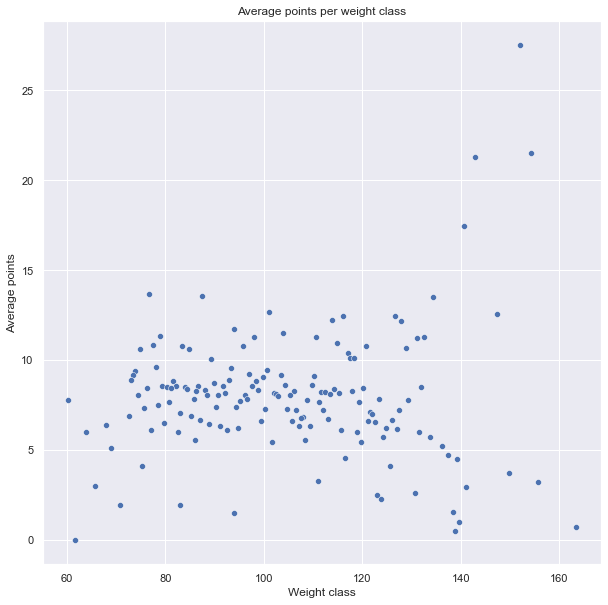

In [976]:
# Does the player's weight affect their performance? 
plt.figure(figsize=(10,10));
player_weights = df.groupby(["player_weight"]).mean().sort_values(by='pts', ascending=False).reset_index()
player_weights_pts_plot = sns.scatterplot(x="player_weight", y="pts", data=player_weights);
player_weights_pts_plot.set_title('Average points per weight class');
player_weights_pts_plot.set(xlabel="Weight class", ylabel = "Average points");

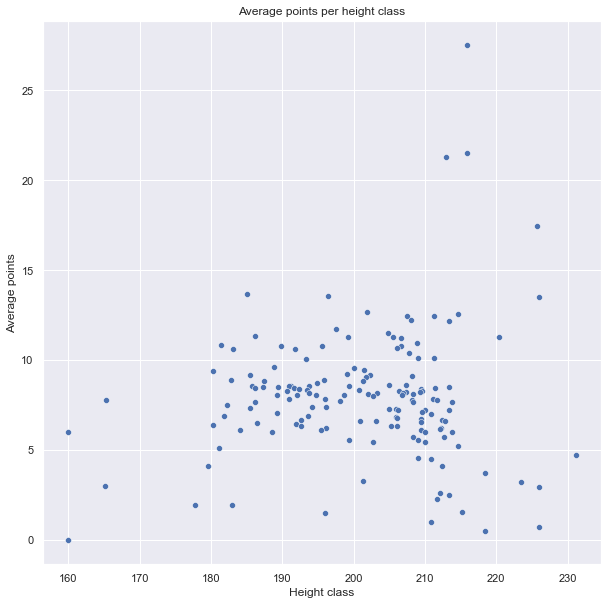

In [977]:
# Does the player's height affect their performance? 
plt.figure(figsize=(10,10));
player_heights = df.groupby(["player_height"]).mean().sort_values(by='pts', ascending=False).reset_index()
player_heights_pts_plot = sns.scatterplot(x="player_height", y="pts", data=player_weights);
player_heights_pts_plot.set_title('Average points per height class');
player_heights_pts_plot.set(xlabel="Height class", ylabel = "Average points");

## **EXPLORATORY DATA ANALYSIS**

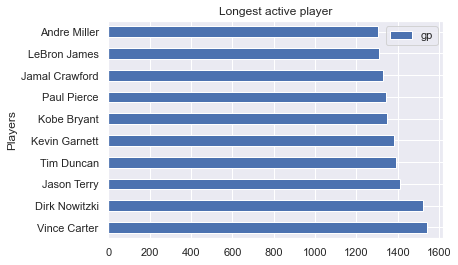

In [978]:
# 1) Who played the most games in the league? 
player_longest_career = df.groupby(["player_name"]).sum().sort_values(by='gp', ascending=False).reset_index()
player_longest_career[:10].plot(kind='barh', y='gp', x='player_name', title='Longest active player', xlabel='Players', ylabel='Games played');

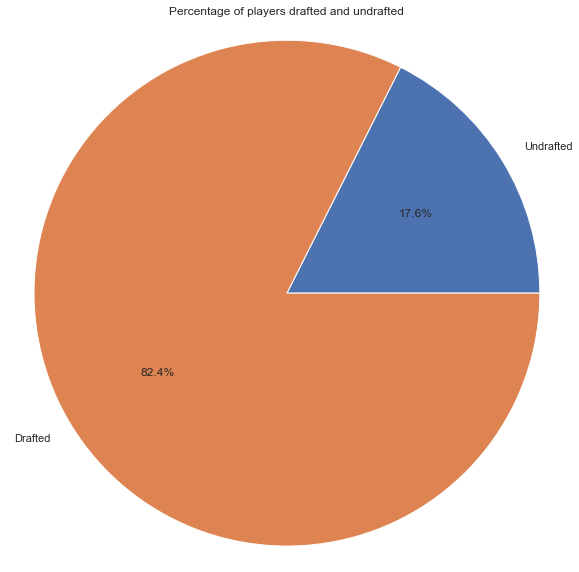

In [979]:
# 2) Calculate the percentage of players that were undrafted. 
#    * To see how many and what players were talented enough to directly sign with an NBA team instead of being drafted.
draft_status_quantitiy = []
draft_status_quantitiy.append(len(df[df['draft_year'] == 'Undrafted']))
draft_status_quantitiy.append(len(df) - len(df[df['draft_year'] == 'Undrafted']))
my_labels = 'Undrafted','Drafted'
plt.figure(figsize=(10,10));
plt.pie(draft_status_quantitiy,labels=my_labels,autopct='%1.1f%%')
plt.title('Percentage of players drafted and undrafted')
plt.axis('equal')
plt.show();

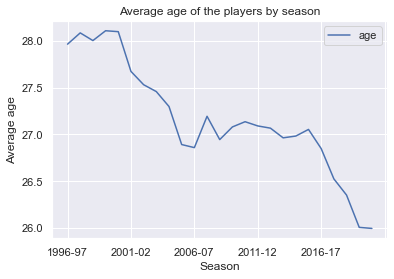

In [980]:
# 3) What is the average age of the players by season?
age_per_season = df.groupby(["season"]).mean().sort_values(by='season', ascending=True).reset_index()
age_per_season.plot(kind='line', y='age', x='season', title='Average age of the players by season', xlabel='Season', ylabel='Average age');

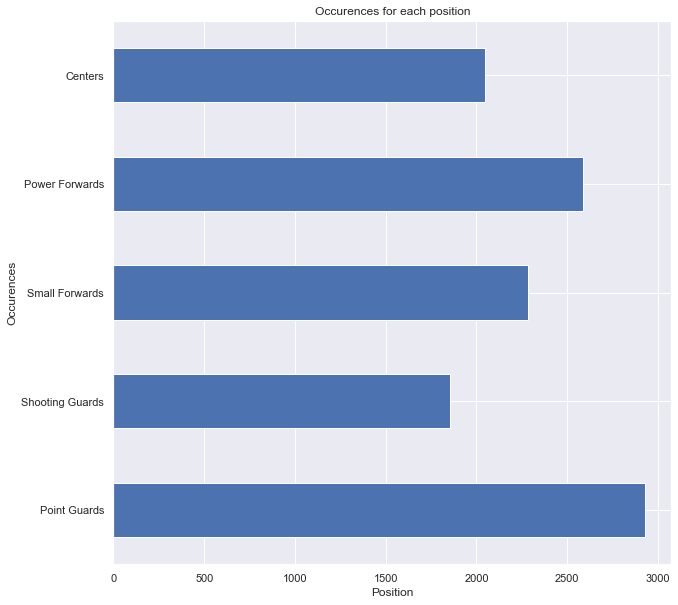

In [981]:
# 4) Determine the position of each player (since it's not provided in the dataset). 
#     * To find the average height per position. 
average_height_PG = 190.5
average_height_SG = 195.58
average_height_SF = 203.2
average_height_PF = 205.74
average_height_C = 210.82

positions_dict = {"Point Guards": 0, "Shooting Guards": 0, "Small Forwards": 0, "Power Forwards": 0, "Centers": 0}

positions_dict["Point Guards"] = len(df[df['player_height'] <= (average_height_PG + average_height_SG) / 2])
positions_dict["Shooting Guards"] = len(df[(df['player_height'] <= (average_height_SF + average_height_SG) / 2) & (df['player_height'] > (average_height_PG + average_height_SG) / 2)])
positions_dict["Small Forwards"] = len(df[(df['player_height'] <= (average_height_PF + average_height_SF) / 2) & (df['player_height'] > (average_height_SF + average_height_SG) / 2)])
positions_dict["Power Forwards"] = len(df[(df['player_height'] <= (average_height_C + average_height_PF) / 2) & (df['player_height'] > (average_height_SF + average_height_PF) / 2)])
positions_dict["Centers"] = len(df[df['player_height'] > (average_height_PF + average_height_C) / 2])

plt.figure(figsize=(10,10));
positions = pd.Series(positions_dict)
plt.title('Occurences for each position')
plt.xlabel('Position')
plt.ylabel('Occurences')
positions.plot.barh();

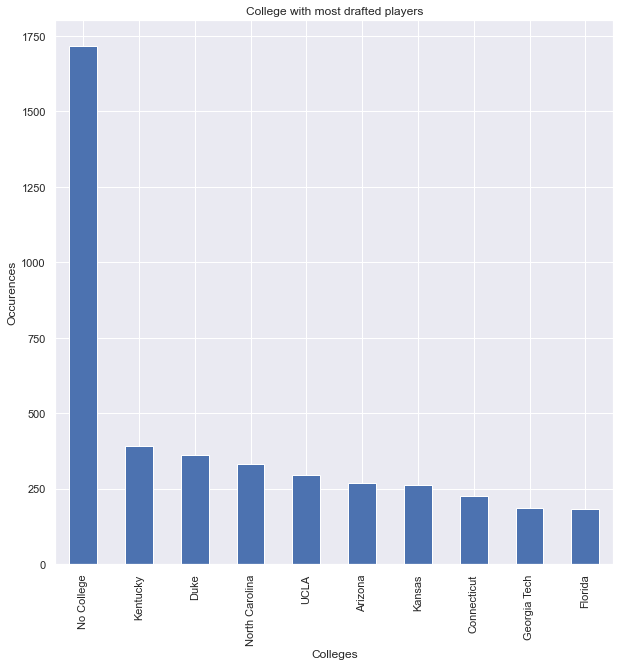

In [982]:
# 5) Find the top 5 colleges. 
#     * To see which colleges most players played for before coming to the NBA.
plt.figure(figsize=(10,10));
plt.title('College with most drafted players')
plt.xlabel('Colleges')
plt.ylabel('Occurences')
df["college"].value_counts()[:10].plot.bar();

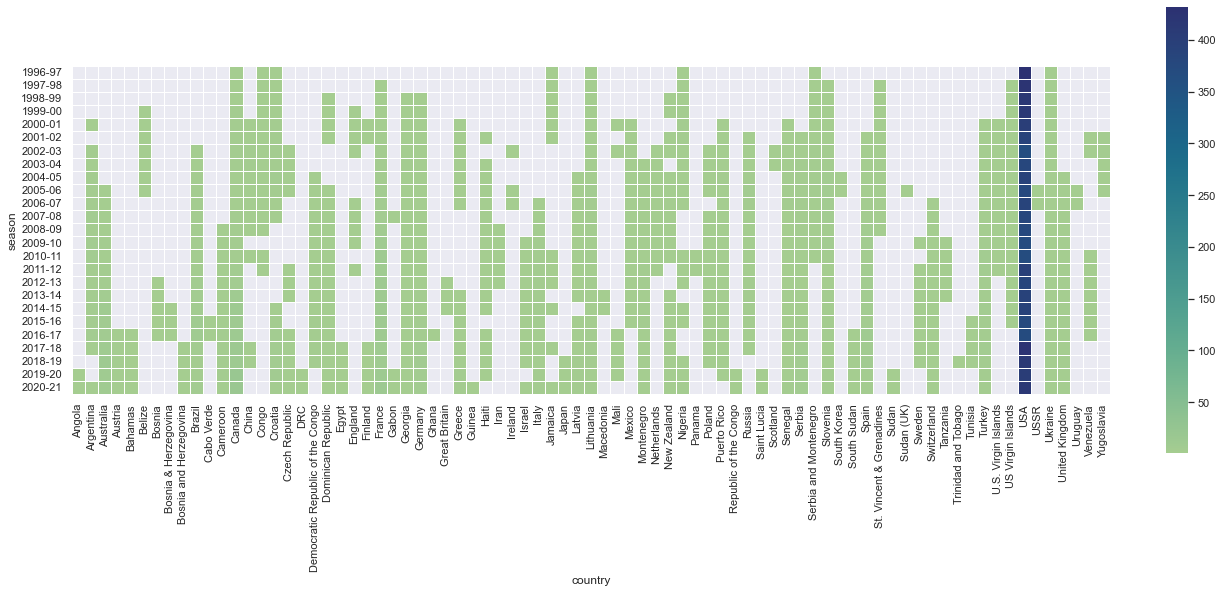

In [983]:
# 6) Display the countries where players are form for each season. 
#     * To see which countries players are coming from the most.
player_countries = df.groupby(['season', 'country']).size().unstack()
sns.set_theme()
plt.figure(figsize=(20,20))
player_countries_heat_map = sns.heatmap(player_countries, square=True, cbar_kws={'fraction' : 0.02}, linewidth=0.5, linewidths=.5, cmap="crest")

In [984]:
# 7) Find the player with the most points, rebounds, and assists, respectively, of all-time. 
player_highest_pts = df.groupby(["player_name"]).mean().sort_values(by='pts', ascending=False).reset_index()
player_highest_ast = df.groupby(["player_name"]).mean().sort_values(by='ast', ascending=False).reset_index()
player_highest_reb = df.groupby(["player_name"]).mean().sort_values(by='reb', ascending=False).reset_index()

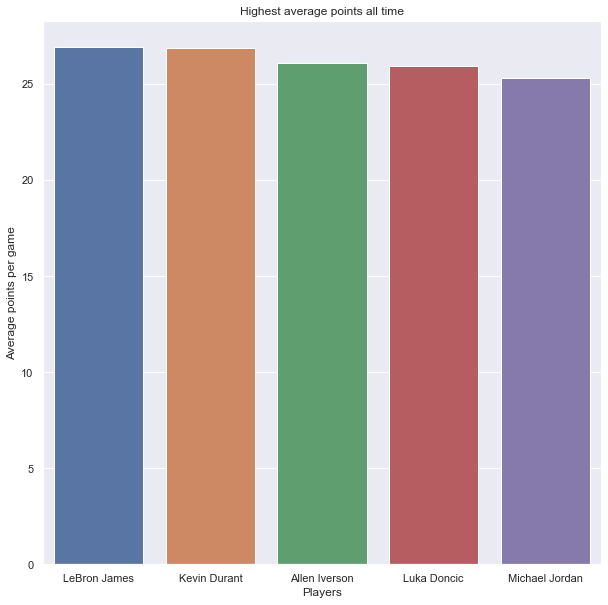

In [985]:
plt.figure(figsize=(10,10));
highest_pts_plot = sns.barplot(x="player_name", y="pts", data=player_highest_pts[:5]);
highest_pts_plot.set_title('Highest average points all time');
highest_pts_plot.set(xlabel="Players", ylabel = "Average points per game");

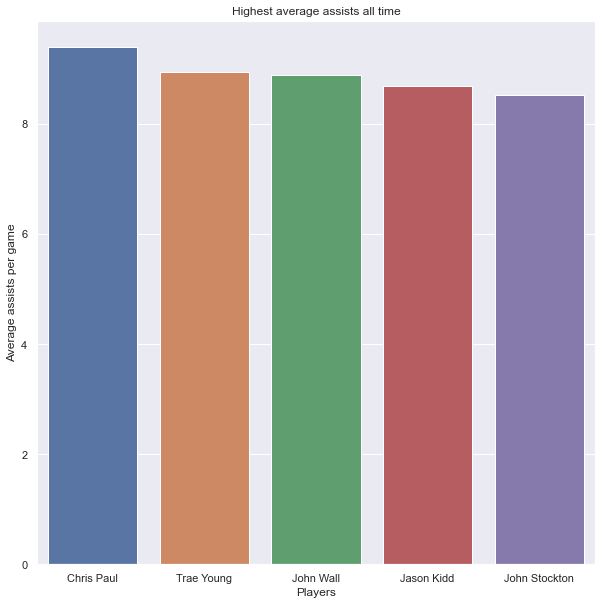

In [986]:
plt.figure(figsize=(10,10));
highest_ast_plot = sns.barplot(x="player_name", y="ast", data=player_highest_ast[:5]);
highest_ast_plot.set_title('Highest average assists all time');
highest_ast_plot.set(xlabel="Players", ylabel = "Average assists per game");

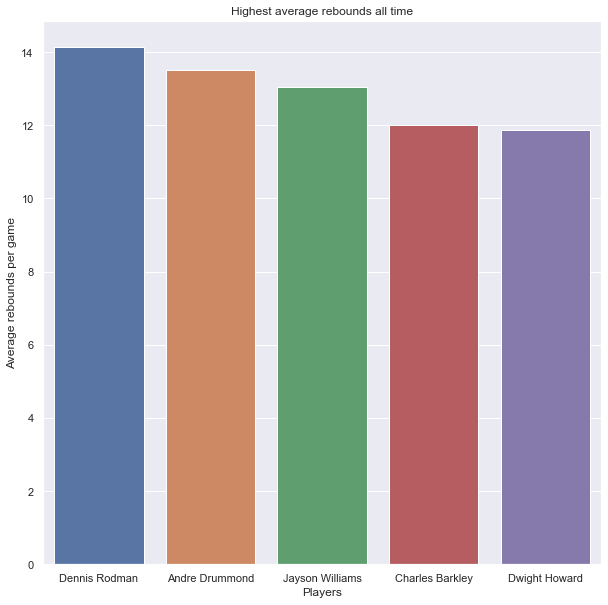

In [987]:
plt.figure(figsize=(10,10));
highest_reb_plot = sns.barplot(x="player_name", y="reb", data=player_highest_reb[:5]);
highest_reb_plot.set_title('Highest average rebounds all time');
highest_reb_plot.set(xlabel="Players", ylabel = "Average rebounds per game");

In [988]:
# 8) Compare first-round, number-one player picks from each draft year.
#     * To find out whether there were any NBA busts from the draft. 
first_overalls = df[df["draft_number"] == '1'].groupby(["player_name"]).mean().round(decimals=2)

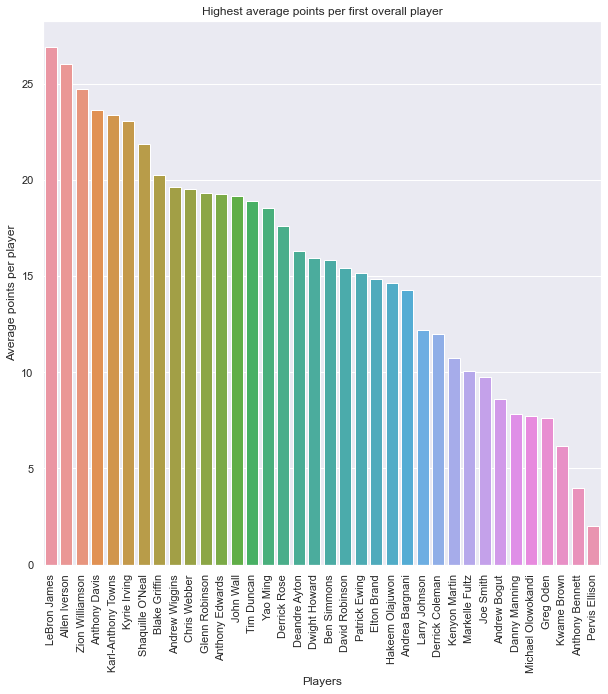

In [989]:
plt.figure(figsize=(10,10));
first_overall_highest_pts_plot = sns.barplot(x="player_name", y="pts", data=first_overalls.sort_values(by='pts', ascending=False).reset_index());
first_overall_highest_pts_plot.set_title('Highest average points per first overall player');
first_overall_highest_pts_plot.set(xlabel="Players", ylabel = "Average points per player");
first_overall_highest_pts_plot.set_xticklabels(first_overall_highest_pts_plot.get_xticklabels(), rotation=90);

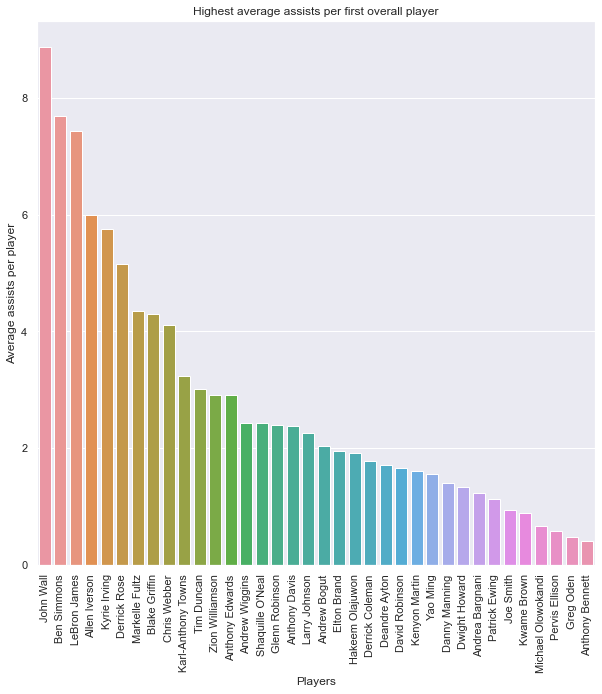

In [990]:
plt.figure(figsize=(10,10));
first_overall_highest_ast_plot = sns.barplot(x="player_name", y="ast", data=first_overalls.sort_values(by='ast', ascending=False).reset_index());
first_overall_highest_ast_plot.set_title('Highest average assists per first overall player');
first_overall_highest_ast_plot.set(xlabel="Players", ylabel = "Average assists per player");
first_overall_highest_ast_plot.set_xticklabels(first_overall_highest_ast_plot.get_xticklabels(), rotation=90);

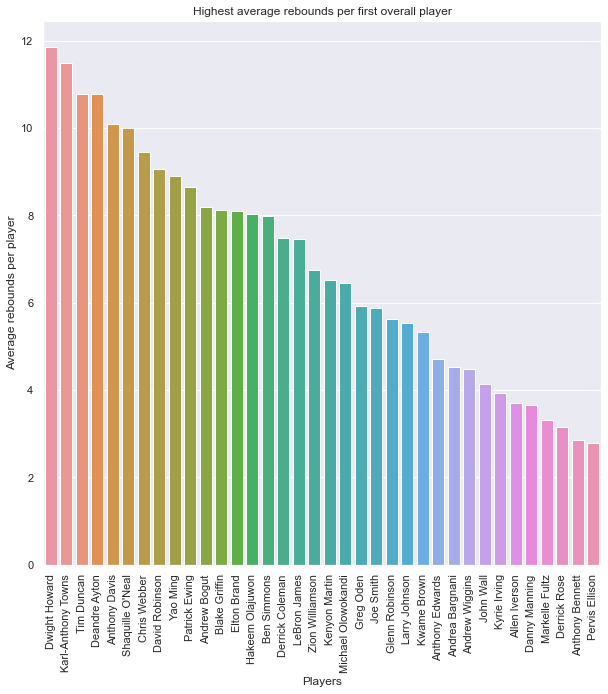

In [991]:
plt.figure(figsize=(10,10));
first_overall_highest_reb_plot = sns.barplot(x="player_name", y="reb", data=first_overalls.sort_values(by='reb', ascending=False).reset_index());
first_overall_highest_reb_plot.set_title('Highest average rebounds per first overall player');
first_overall_highest_reb_plot.set(xlabel="Players", ylabel = "Average rebounds per player");
first_overall_highest_reb_plot.set_xticklabels(first_overall_highest_reb_plot.get_xticklabels(), rotation=90);

In [992]:
# 9) All-Star players? (All-Star player defined as pts: 20+, reb: 7+, ast: 7+). 
players_score = df.groupby(["player_name"]).mean().round(decimals=2)
def all_star_checker(player):
    if (player['pts'] >= 20) | (player['ast'] >= 7) | (player['reb'] >= 7) | (player['net_rating'] >= 25) | (player['oreb_pct'] >= 0.50) | (player['dreb_pct'] >= 0.50) & (player['ts_pct'] >= 0.5):
        return 1
    else:
        return 0

players_score["All_Star"] = players_score.apply(all_star_checker, axis=1)
players_score[players_score['All_Star'] == 1]

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,ts_pct,All_Star
player_name,,,,,,,,,,,,
Al Horford,28.50,207.92,111.45,62.93,14.04,8.05,3.24,3.36,0.07,0.20,0.57,1
Al Jefferson,26.50,208.28,125.55,65.36,15.21,8.16,1.43,-3.34,0.09,0.25,0.53,1
Allen Iverson,28.50,182.88,75.81,65.29,26.06,3.69,6.00,0.60,0.02,0.08,0.52,1
Alonzo Mourning,32.45,208.28,118.39,50.27,13.47,7.05,0.88,4.41,0.10,0.20,0.57,1
Amar'e Stoudemire,26.50,208.82,111.84,60.43,17.51,7.39,1.15,1.56,0.09,0.20,0.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Wendell Carter Jr.,21.00,207.43,120.20,47.00,10.93,8.20,1.63,-7.07,0.09,0.21,0.57,1
Yao Ming,25.62,228.28,139.82,60.75,18.56,8.91,1.55,2.01,0.09,0.23,0.59,1
Zach Randolph,28.00,205.74,116.44,65.65,16.21,8.89,1.81,-2.16,0.11,0.24,0.52,1


## **POTENTIAL DATA SCIENCE**

In [993]:
# For Data Science Application
import sys
!{sys.executable} -m pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [994]:
print(players_score.All_Star.value_counts())

0    2171
1     162
Name: All_Star, dtype: int64


In [995]:
y = players_score['All_Star']
y

player_name
A.C. Green            0
A.J. Bramlett         0
A.J. Guyton           0
AJ Hammons            0
AJ Price              0
                     ..
Zion Williamson       1
Zoran Dragic          0
Zoran Planinic        0
Zydrunas Ilgauskas    1
Zylan Cheatham        0
Name: All_Star, Length: 2333, dtype: int64

In [996]:
X_train, X_test, y_train, y_test = train_test_split(players_score[['pts', 'ast', 'reb', 'oreb_pct', 'dreb_pct', 'ts_pct', 'net_rating']], y, test_size = 0.25, random_state = 0)

In [997]:
pip_prdict = Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])
pip_prdict.fit(X_train, y_train)
y_pred = pip_prdict.predict(X_test)
accuracy_score(pip_prdict.predict(X_test), y_test)

0.9708904109589042

              precision    recall  f1-score   support

    All-Star       0.98      0.99      0.98       540
Not All-Star       0.85      0.75      0.80        44

    accuracy                           0.97       584
   macro avg       0.91      0.87      0.89       584
weighted avg       0.97      0.97      0.97       584



C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


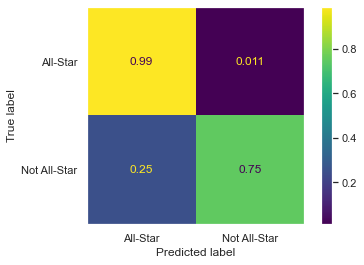

In [998]:
print(classification_report(y_test, y_pred, target_names = ['All-Star', 'Not All-Star']))
plot_confusion_matrix(pip_prdict, X_test, y_test, display_labels = ['All-Star', 'Not All-Star'], normalize = 'true');
plt.grid(False);

In [999]:
def met_potential_checker(player):
    if (player['pts'] >= 20) | (player['ast'] >= 7) | (player['reb'] >= 7) & (player['net_rating'] >= 0) | (player['oreb_pct'] >= 0.50) | (player['dreb_pct'] >= 0.50) & (player['ts_pct'] >= 0.5):
        return 1
    else:
        return 0
first_overalls["Met_Potential"] = first_overalls.apply(met_potential_checker, axis=1)

In [1000]:
print(first_overalls.Met_Potential.value_counts())

1    19
0    17
Name: Met_Potential, dtype: int64


In [1001]:
y = first_overalls['Met_Potential']
y

player_name
Allen Iverson         1
Andrea Bargnani       0
Andrew Bogut          1
Andrew Wiggins        0
Anthony Bennett       0
Anthony Davis         1
Anthony Edwards       0
Ben Simmons           1
Blake Griffin         1
Chris Webber          1
Danny Manning         0
David Robinson        1
Deandre Ayton         1
Derrick Coleman       0
Derrick Rose          0
Dwight Howard         1
Elton Brand           0
Glenn Robinson        0
Greg Oden             0
Hakeem Olajuwon       1
Joe Smith             0
John Wall             1
Karl-Anthony Towns    1
Kenyon Martin         0
Kwame Brown           0
Kyrie Irving          1
Larry Johnson         0
LeBron James          1
Markelle Fultz        0
Michael Olowokandi    0
Patrick Ewing         1
Pervis Ellison        0
Shaquille O'Neal      1
Tim Duncan            1
Yao Ming              1
Zion Williamson       1
Name: Met_Potential, dtype: int64

In [1002]:
X_train, X_test, y_train, y_test = train_test_split(first_overalls[['pts', 'ast', 'reb', 'net_rating']], y, test_size = 0.25, random_state = 0)

In [1003]:
pip_prdict = Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])
pip_prdict.fit(X_train, y_train)
y_pred = pip_prdict.predict(X_test)
accuracy_score(pip_prdict.predict(X_test), y_test)

0.8888888888888888

              precision    recall  f1-score   support

         Gem       0.80      1.00      0.89         4
        Bust       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


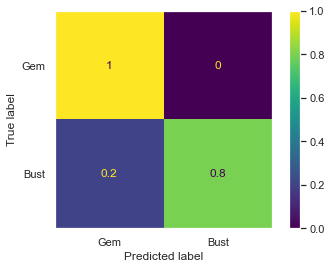

In [1004]:
print(classification_report(y_test, y_pred, target_names = ['Gem', 'Bust']))
plot_confusion_matrix(pip_prdict, X_test, y_test, display_labels = ['Gem', 'Bust'], normalize = 'true');
plt.grid(False);

In [1005]:
def NBA_player_checker(player):
    if (player['pts'] >= 5) | (player['ast'] >= 2) | (player['reb'] >= 2) & (player['net_rating'] >= 0) | (player['oreb_pct'] >= 0.1) | (player['dreb_pct'] >= 0.1) & (player['ts_pct'] >= 0.25):
        return 1
    else:
        return 0

players_score["NBA_Player"] = players_score.apply(NBA_player_checker, axis=1)

In [1006]:
print(players_score.NBA_Player.value_counts())

1    2005
0     328
Name: NBA_Player, dtype: int64


In [1007]:
y = players_score['NBA_Player']
y

player_name
A.C. Green            1
A.J. Bramlett         1
A.J. Guyton           0
AJ Hammons            1
AJ Price              1
                     ..
Zion Williamson       1
Zoran Dragic          0
Zoran Planinic        1
Zydrunas Ilgauskas    1
Zylan Cheatham        1
Name: NBA_Player, Length: 2333, dtype: int64

In [1008]:
X_train, X_test, y_train, y_test = train_test_split(players_score[['pts', 'ast', 'reb', 'net_rating', 'ts_pct', 'oreb_pct', 'dreb_pct']], y, test_size = 0.25, random_state = 0)

In [1009]:
pip_prdict = Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])
pip_prdict.fit(X_train, y_train)
y_pred = pip_prdict.predict(X_test)
accuracy_score(pip_prdict.predict(X_test), y_test)

0.9212328767123288

                precision    recall  f1-score   support

    NBA_Player       0.73      0.66      0.69        79
Not NBA_Player       0.95      0.96      0.95       505

      accuracy                           0.92       584
     macro avg       0.84      0.81      0.82       584
  weighted avg       0.92      0.92      0.92       584



C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


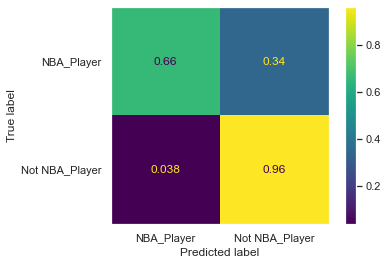

In [1010]:
print(classification_report(y_test, y_pred, target_names = ['NBA_Player', 'Not NBA_Player']))
plot_confusion_matrix(pip_prdict, X_test, y_test, display_labels = ['NBA_Player', 'Not NBA_Player'], normalize = 'true');
plt.grid(False);

## **CONCLUSION**

## **Description of Dataset:**

The chosen dataset contains over two decades of statistics about each player that has been a part of the NBA (National Basketball Association). It is comprised of many variables including player age, height, weight, college attended, country born and game box scores. There are 22 data attributes in total offering a great range for data analysis.

It was collected through the official NBA website and https://www.basketball-reference.com/ found via Kaggle from Justinas Cirtautas (https://www.kaggle.com/justinas/nba-players-data). This dataset represents the the details of each NBA player for each season from 1996 to 2021. 

### Here are the 22 attributes/columns in this dataset:

* index                - Player index / Row number
* player_name          - Name of player
* team_abbreviation    - Abbreviated name of the team the player played for
* age                  - Age of player
* player_height        - Height of the player (cm)
* player_weight        - Weight of the player (kg)
* college              - Name of the college player attended
* country              - Name of the country player was born in
* draft_year           - The year the player was drafted
* draft_round          - The draft round the player was picked
* draft_number         - The draft number at which the player was picked in his draft round
* gp                   - Games played throughout the season
* pts                  - Average number of points scored
* reb                  - Average number of rebounds grabbed
* ast                  - Average number of assists distributed
* net_rating           - Team’s point differential/100 possessions while player is on court
* oreb_pct             - % of available offensive rebounds the player grabbed on court
* dreb_pct             - % of available defensive rebounds the player grabbed on court
* usg_pct              - % of team plays used by the player while on court
* ts_pct               - Measure of player’s shooting efficiency
* ast_pct              - % of teammate field goals the player assisted on court
* season               - NBA season

## **Proposal & Motivation:**



### Why we chose this dataset?

As big fans of the NBA and the sport of basketball, we found this dataset very interesting. There is a lot of interesting information regarding all the NBA players over the years and we are excited to study research questions pertaining to all players in the league. Unlike other datasets, this one is actually a topic of interest for us and gives us the opportunity to both practice data analysis and learn more about the sport we love!

### Another dataset we considered:

Yes! We were originally going to use another NBA dataset (https://www.kaggle.com/nathanlauga/nba-games?select=games.csv). It also had some very insightful data, however, we felt that it was far more focused on the NBA team's performances, rather than the players. As a group, we were more interested to research the data of the players to visualize talent existent within the league since 1996. 

## **Data Analysis Questions:**

### Here are a few tentative questions that we would like to study for this dataset: 

1) Calculate the percentage of players that were undrafted. 
    * To see how many and what players were talented enough to directly sign with an NBA team instead of being drafted.
2) What is the average age of the players by season?
3) Find the top 5 colleges. 
    * To see which colleges most players played for before coming to the NBA.
4) Find the top 5 countries NBA players are from. 
    * To see what percentage of players from each unique country
5) All-Star player from each unique country? (All-Star player defined as pts: 25+, reb: 7+, ast: 7+). 
6) Compare first-round, number-one player picks from each draft year.
    * To find out whether there were any NBA busts from the draft. 
7) Determine the position of each player (since it's not provided in the dataset). 
    * To find the average height per position. 
8) Does the player's weight affect their performance? 
9) Who is the longest active player in the league? 
10) Find the player with the most points, rebounds, and assists, respectively, of all-time. 

### Methods to Apply to Answer the above: 

To begin, we will utilize Python's in-built libraries extensively and use multiple functions such as, 'map', 'filter', and 'reduce'. We plan to primarily Numpy for the programming of most of the data as it is mostly comprised of numerical values. However, we expect to learn new things in the near future of this course, including Pandas and Mathplotlib. Both Pandas and Mathplotlib will help greatly to visualize and process the data in different aspects using graphs and charts. Furthermore, we will analyze the data using mathematical, statistical analysis, and attributes to complete conclusions to our questions of research.  

### Potential for Data Science Applications: 

There is great potential to apply our knowledge of data science and translate it to the data of NBA players. We can predict players' performance and development over their NBA career. In a real-life scenario, we can recommend colleges to those interested to join the NBA for their future. We can also simulate the players' projected growth (whether they will become an all-star) and work with the coaching staff to provide them with such information, so they can make the essential adjustments to players' training and development. Most importantly, we would be able to visualize the diversity of players within the NBA. 

External Links


http://www.draftexpress.com/average-measurements-by-position/all/NBA+Draft+Combine/all/all/
